In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm


DATADIR = "C:/Users/20115/Desktop/Dataset/train"
CATEGORIES = ["NORMAL","Sick"]

for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break

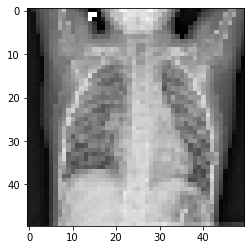

In [4]:
IMG_SIZE = 200

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
    

In [6]:
print(len(training_data))

636


In [34]:
import random

random.shuffle(training_data)

In [35]:
for sample in training_data[1:10]:
    print(sample[1])

0
1
0
0
1
0
1
0
1
0


In [50]:
X=[]
y=[]

In [43]:

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)



X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

In [58]:
import pickle

pickle_out = open("lames.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("hh.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [59]:
X[1]

array([[[5.42777665e-07],
        [7.84012182e-07],
        [6.03086294e-07],
        ...,
        [4.82469035e-07],
        [6.75456649e-06],
        [1.07952447e-05]],

       [[6.03086294e-07],
        [5.42777665e-07],
        [4.82469035e-07],
        ...,
        [4.82469035e-07],
        [6.45302335e-06],
        [1.04333929e-05]],

       [[5.42777665e-07],
        [5.42777665e-07],
        [4.22160406e-07],
        ...,
        [1.80925888e-07],
        [6.39271472e-06],
        [1.00715411e-05]],

       ...,

       [[7.53857868e-06],
        [7.17672690e-06],
        [6.39271472e-06],
        ...,
        [4.82469035e-06],
        [7.84012182e-07],
        [2.77419695e-06]],

       [[7.05610964e-06],
        [6.81487512e-06],
        [5.91024568e-06],
        ...,
        [4.94530761e-06],
        [4.22160406e-07],
        [2.83450558e-06]],

       [[6.87518375e-06],
        [6.81487512e-06],
        [5.78962842e-06],
        ...,
        [4.46283858e-06],
        [6.0308

3-conv-64-nodes-0-dense-1588474623


ValueError: You are passing a target array of shape (636, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

NameError: name 'history' is not defined

In [32]:
 # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT